In [14]:
import pandas as pd

df = pd.read_excel('for verifications.xlsx')

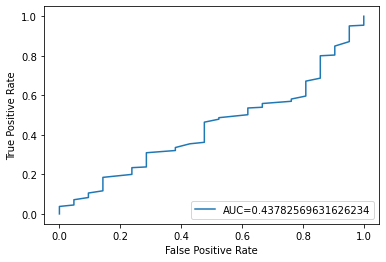

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr = []
tpr = []

current_fpr = 0
current_tpr = 0

for threshold in range(180, 366):
    p = 0
    n = 0
    fp = 0
    tp = 0
    for value in df.values:
        if value[3]==1:
            p+=1
        if value[3]==0:
            n+=1
        if value[3]==1 and value[4]>=threshold:
            tp+=1
        if value[3]==0 and value[4]>=threshold:
            fp+=1        
    fpr.append(fp/n)
    tpr.append(tp/p)

auc = metrics.auc(fpr, tpr)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()